In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/sample_data/reduced_selected_features.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      297 non-null    int64  
 1   thal_7.0  297 non-null    bool   
 2   thalach   297 non-null    int64  
 3   ca        297 non-null    float64
 4   exang_1   297 non-null    bool   
 5   age       297 non-null    int64  
 6   trestbps  297 non-null    int64  
 7   cp_4      297 non-null    bool   
 8   oldpeak   297 non-null    float64
 9   target    297 non-null    int64  
dtypes: bool(3), float64(2), int64(5)
memory usage: 17.2 KB


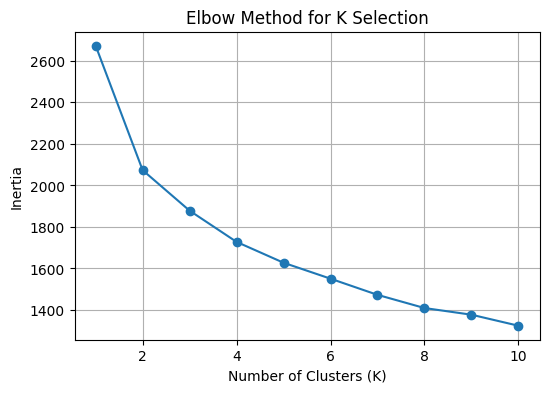

In [5]:
# perform k-means clustering
X=df.drop('target',axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K Selection")
plt.grid()
plt.show()


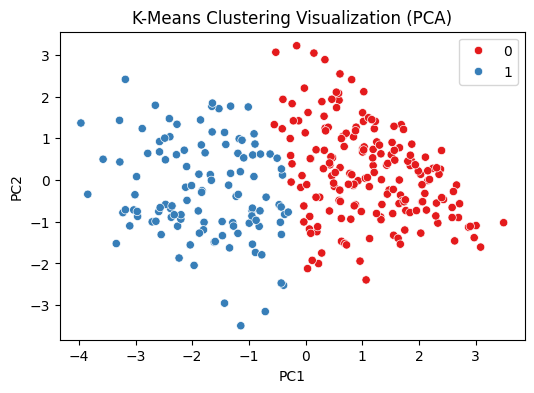

In [23]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set1')
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

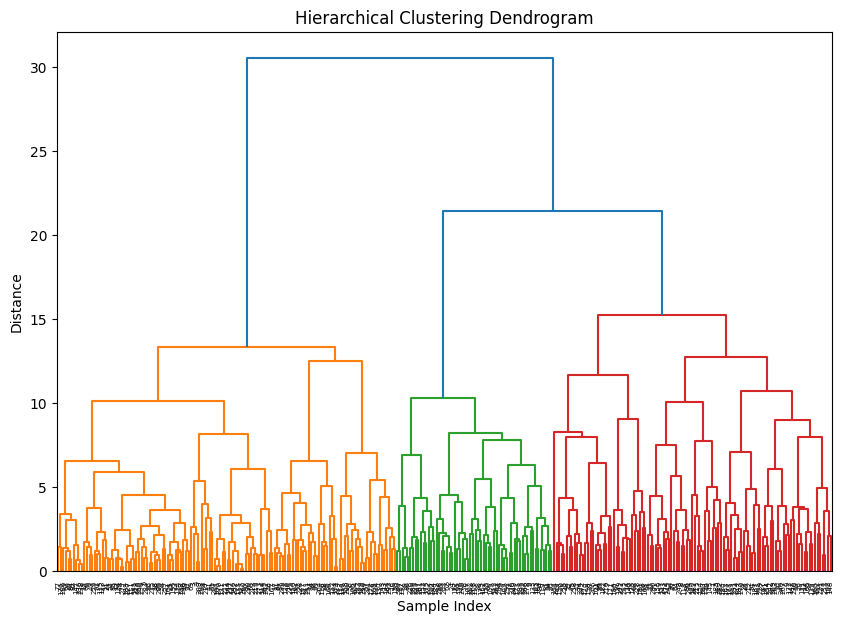

In [24]:
# perform hierarchical clustering
Linked= linkage(X_scaled, method='ward')
# plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Linked, leaf_rotation=90)
plt.show()

In [25]:
# Suppose y is the true label: 0 = No Disease, 1 = Disease
# Cluster labels may not match, so compare both arrangements
y=df['target']
cm1 = confusion_matrix(y, cluster_labels)
cm2 = confusion_matrix(y, 1 - cluster_labels)

print("Confusion Matrix Option 1:\n", cm1)
print("Confusion Matrix Option 2 (flipped labels):\n", cm2)


Confusion Matrix Option 1:
 [[144  16]
 [ 38  99]]
Confusion Matrix Option 2 (flipped labels):
 [[ 16 144]
 [ 99  38]]


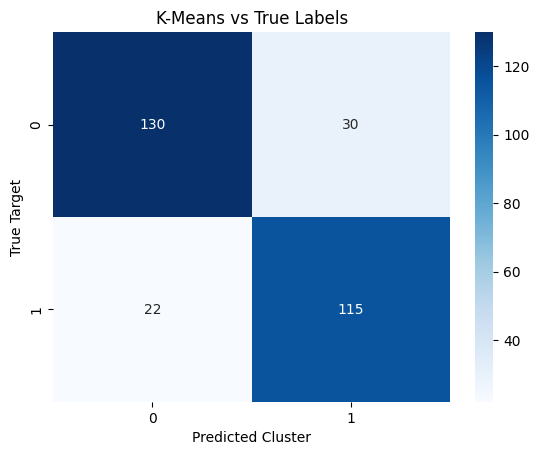

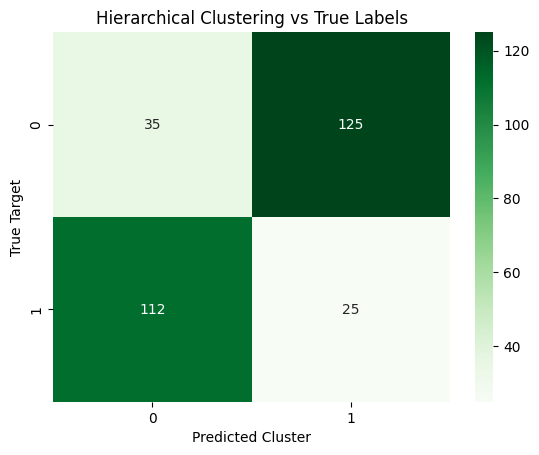

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)
# Add to DataFrame
df['cluster_hc'] = clusters_hc

y=df['target']

# KMeans
cm_kmeans = confusion_matrix(y, df['cluster_kmeans'])
sns.heatmap(cm_kmeans, annot=True, cmap='Blues', fmt='d')
plt.title("K-Means vs True Labels")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Target")
plt.show()

# Hierarchical
cm_hc = confusion_matrix(y, df['cluster_hc'])
sns.heatmap(cm_hc, annot=True, cmap='Greens', fmt='d')
plt.title("Hierarchical Clustering vs True Labels")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Target")
plt.show()
